Applying custom colormaps and colorlists to matplotlib plots
Specially from [Palettable](https://jiffyclub.github.io/palettable/)

Palettable can be installed using: ``` pip install palettable```

#### 1. Colormaps:
Colormaps are easy as you just need to load the object and feed it to cmap parameter:

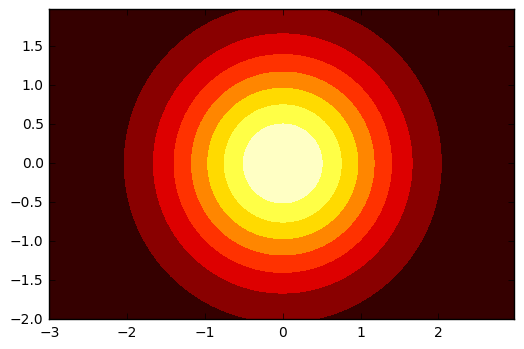

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.mlab as mlab    # just for making fake data

# Making fake data
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)

# Plotting the contourmap with a matplotlib colormap
plt.contourf(X, Y, Z,cmap='hot');

Now let's use a something from palettable, but first let's play around with functions in palettable:

So each color palett group has multiple colorpaletts and each have various attributes and properties allowing you to preview the palett:

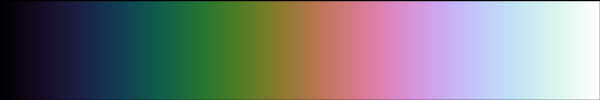

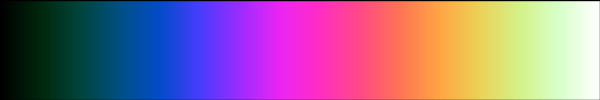

In [2]:
import palettable
palettable.cubehelix.classic_16.show_continuous_image()
palettable.cubehelix.cubehelix3_16.show_continuous_image()

I use cubehelix here which is good for B/W printing as it keeps the colors distinguishable.

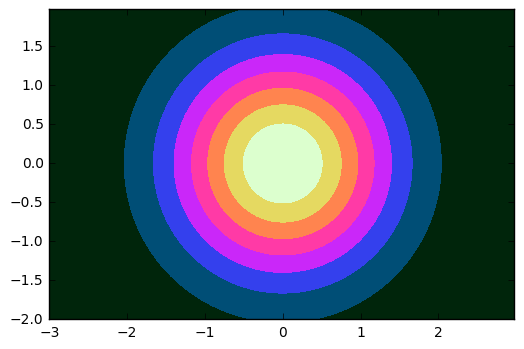

In [3]:
plt.contourf(X, Y, Z, cmap=palettable.cubehelix.cubehelix3_16.mpl_colormap);

#### Colorlists:
Changing matplotlib's colorlist for plotting is slightly trickier. Consider a normal plot with multiple curves:

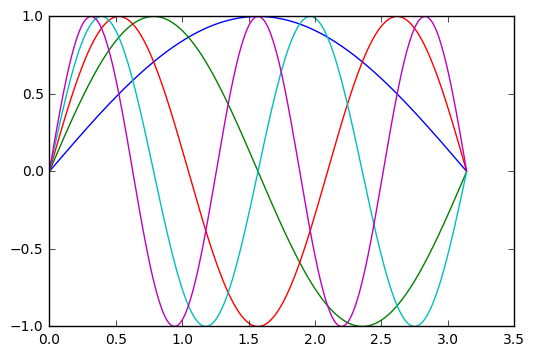

In [4]:
x=np.arange(0,np.pi,0.01)
plt.plot(x, np.sin(x))
plt.plot(x, np.sin(2*x))
plt.plot(x, np.sin(3*x))
plt.plot(x, np.sin(4*x))
plt.plot(x, np.sin(5*x))

Similar to colormaps, you can preview colorlists:

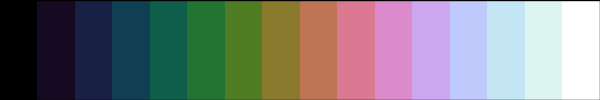

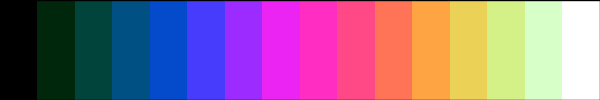

In [5]:
palettable.cubehelix.classic_16.show_discrete_image()
palettable.cubehelix.cubehelix3_16.show_discrete_image()

You have to change plot's rc parameter "```axes```"'s "```color```" properties and the object you replace the default "```color```" with can be a "cycler" object (so it can iterate over itself). So, we use ```cycler``` package:

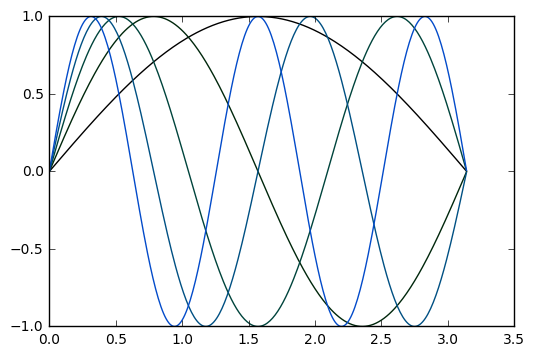

In [6]:
from cycler import cycler
plt.rc('axes',prop_cycle=(cycler('color',palettable.cubehelix.cubehelix3_16.mpl_colors)))
plt.plot(x, np.sin(x))
plt.plot(x, np.sin(2*x))
plt.plot(x, np.sin(3*x))
plt.plot(x, np.sin(4*x))
plt.plot(x, np.sin(5*x))

Now, here's the problem: there are too few curves for the color list to go through its complete list and show a nice color contrast and these look very similar. So you can force it to skip one or two colors while looping over colors:

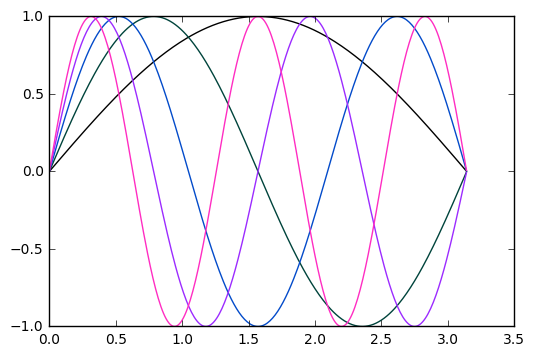

In [7]:
from cycler import cycler
plt.rc('axes',prop_cycle=(cycler('color',palettable.cubehelix.cubehelix3_16.mpl_colors[::2]))) # skip every other color
plt.plot(x, np.sin(x))
plt.plot(x, np.sin(2*x))
plt.plot(x, np.sin(3*x))
plt.plot(x, np.sin(4*x))
plt.plot(x, np.sin(5*x))

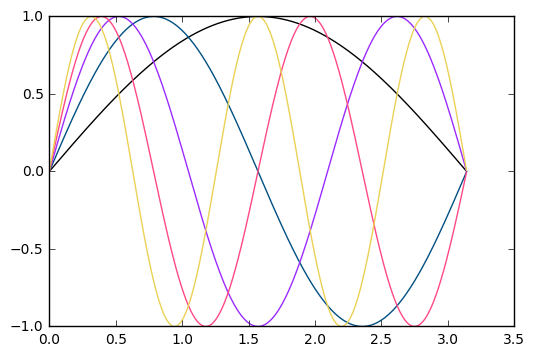

In [8]:
from cycler import cycler
plt.rc('axes',prop_cycle=(cycler('color',palettable.cubehelix.cubehelix3_16.mpl_colors[::3]))) # skip every two colors
plt.plot(x, np.sin(x))
plt.plot(x, np.sin(2*x))
plt.plot(x, np.sin(3*x))
plt.plot(x, np.sin(4*x))
plt.plot(x, np.sin(5*x))